# K- Nearest Neighbor algorithm

Gabriela Elizabeth Avila Chan
2009003

This supervised machine learning algorithm can be used for classification and regression problems, but it is more commonly associated with classification. K-NN classifies items based on the training given by a dataset to nearby examples.

In other words, K-NN helps to make decisions by analyzing all the elemnts of the data set and selecting the the "k" number of elements closer to the new data point. After the selection has been made, then the algorithm will predict in which data group that new data point is most likely to be in, and that prediction will be displayed as the possible value of that new data point.

Its important to mention that the prediction is determined by taking a majority vote (for classification) or calculating an average (for regression) from the selected neighbors.


***---> Algorithm pseudocode***

In [ ]:
# 1. Start
# 2. Upload the dataset selected
# 3. Store the characteristic vectors and the element class labels
# 4. Select the "k" number of neighbors to consider
# 5. For all the data in the dataset:
#    5.1 Calculate the distance between the stored vectors and the new vector
#    5.2 Store those distances and arrange them
# 6. Select the "K" data points that are closest to the new vector
# 7. Determine the class for the test point based on the majority of classes among the selected 'K' points
#    7.1 Validate the accuracy of the prediction by using a confusion matrix
# 8. End

***---> Algorithm implementation***

This dataset analyses the different characteristics of patients with hearth diseases, therefore, I displayed the data set to use some of the comlumns to asign them as the variables. Then I split them into two classes, one to use as training data and the second one to use as the test data of the algorithm.

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("/content/heart.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data1 = ['age']
x = dataset[data1]

data2 = ['sex']
y = dataset[data2]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test , y_train , y_test = train_test_split ( x, y, test_size=0.25, random_state=0)

sc = StandardScaler( )

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 4 17]
 [14 41]]


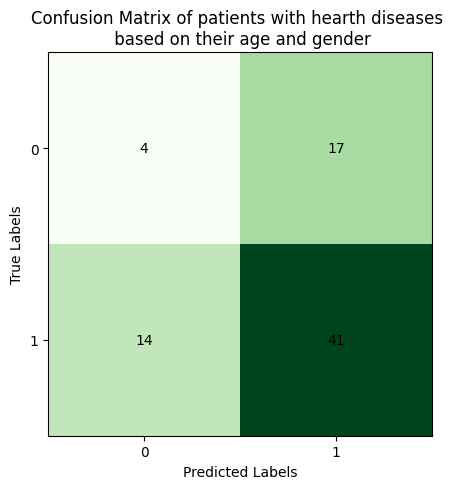

In [ ]:
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix of patients with hearth diseases \n based on their age and gender')

classes = ['0', '1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5921052631578947


According to the graph above the true positive results of the algorith correctly clasifying the 1 as 1 are 41 results, and the 0 clasified as 0 are 4 results. In the other hand, there is the false negatives, the first one is the 1  clasified as 0 are 17 results, and the 0 clasified as 1 are 14 results. This results can be supported by the accuracy test of 0.59%.

***---> Loss function + Optimization function identification.***

A loss function is something that tells us a measure of how much our predicted values are deviating from the actual value, therefore this function for algorithms that learn from labeled data and adjusts its parameters to minimize a loss or error. In this case the KNN algortihm stores the entire training dataset and makes predictions based on them.

On the other hand, the optimatization function is not commonly used since this algorithm does not have a traditional model or parameters to optimize through the traditional optimization techniques. Even though, this algorithm has some parameters that can be optimize to have their best performance posible, for example, the numer of "k" neighbors selected ot be use.